In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pygame
from sklearn.metrics import silhouette_samples, silhouette_score

In [33]:
filepath = 'C:\\Users\\Shaurya\\Downloads\\Project_3\\Project_3\\Country-data.csv'
def z_score_standardization(column):
    if(column.dtype == float):
        return (column - column.mean()) / column.std()
    else:
        return (column)
data = pd.read_csv(filepath)
data = data.drop('country', axis=1)
#data1=data1.drop(data1.iloc[0])
df = data.apply(z_score_standardization) #applying the
df.reset_index(drop=True)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,1610,0.156864,-1.614237,1.897176,553
1,-0.537333,-0.478220,-0.096725,0.070624,9930,-0.311411,0.645924,-0.857394,4090
2,-0.272015,-0.098824,-0.963176,-0.639838,12900,0.786908,0.668413,-0.038289,4460
3,2.001787,0.773056,-1.443729,-0.164820,5900,1.382894,-1.175698,2.121770,3530
4,-0.693548,0.160186,-0.286034,0.496076,19100,-0.599944,0.702147,-0.540321,12200
...,...,...,...,...,...,...,...,...,...
162,-0.224902,0.200315,-0.569997,0.239979,2950,-0.488315,-0.849606,0.364658,2970
163,-0.524935,-0.459980,-0.693776,-1.209860,16500,3.606020,0.544723,-0.315728,13500
164,-0.371199,1.126916,0.008851,1.375892,4490,0.408503,0.286097,-0.659224,1310
165,0.447072,-0.405259,-0.595481,-0.515920,4480,1.496416,-0.343599,1.137523,1310


In [34]:
def meaner(column):
    return column-column.mean()
df = df.apply(meaner)
cov_mat = np.cov(df , rowvar = False)
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
n_components = 2
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
df_reduced = np.dot(eigenvector_subset.transpose(),df.transpose()).transpose()
df_reduced = pd.DataFrame(df_reduced , columns = ['PC1','PC2'])
df_reduced

,PC1,PC2
0,-19815.076416,1651.086655
1,-11338.957077,-1493.459907
2,-8926.363391,-3264.671877
3,-14652.414826,867.789378
4,896.114392,-1898.461396
...,...,...
162,-17180.985483,2487.181286
163,-100.451370,832.263072
164,-17202.057469,222.947181
165,-17209.325056,229.816254


In [35]:
def random_centroid(X,k):
    random_idx=[np.random.randint(len(X)) for i in range(k)]
    centroids=[]
    for i in random_idx:
        centroids.append(X.iloc[i])
    return centroids

In [36]:
def assign_cluster(X, initial_centroids, k):
    clusters = []
    for i in range(len(X)):
        euclidean_distances = []
        for j in range(k):
            euclidean_distances.append(np.linalg.norm(np.array(X.iloc[i]) - initial_centroids[j]))
        index = np.argmin(euclidean_distances)
        clusters.append(index)
    return np.asarray(clusters)

In [37]:
def compute_centroid(X,clusters,k):
    centroid=[]
    for i in range(k):
        temp=[]
        for j in range(len(X)):
            if clusters[j]==i:
                temp.append(X.iloc[j])
        centroid.append(np.mean(temp,axis=0))
    return np.asarray(centroid)

In [38]:
def difference(prev,next):
    diff=0
    for i in range(len(prev)):
        diff+=np.linalg.norm(prev[i]-next[i])
    return diff

In [39]:
def show_clusters(X,clusters,centroids,initial_centroids,mark_centroid=True,show_ini_centroid=True,show_plots=True):
    cols={0:'r',1:'g',2:'b',3:'coral'}
    fig,ax=plt.subplots(figsize=(7.5,6))
    for i in range(len(clusters)):
        ax.scatter(X.iloc[i][0],X.iloc[i][1],color=cols[clusters[i]])
    for j in range(len(centroids)):
        ax.scatter(centroids[j][0],centroids[j][1],marker='*',color=cols[j])
        if show_ini_centroid==True:
            ax.scatter(initial_centroids[j][0],initial_centroids[j][1],marker='+',s=150,color=cols[j])
    if mark_centroid==True:
        for i in range(len(centroids)):
            ax.add_artist(plt.Circle((centroids[j][0],centroids[j][1]),0.4,linewidth=2,fill=False))
            if show_ini_centroid==True:
                ax.add_artist(plt.Circle((initial_centroids[j][0],initial_centroids[j][1]), 0.4, linewidth=2,color='y', fill=False))
    ax.set_xlabel("PCA1")
    ax.set_ylabel("PCA2")
    if show_plots==True:
        plt.show()


Initial cluster Centers: 

[PC1   -15032.603056
PC2      552.897680
Name: 65, dtype: float64, PC1   -19084.236562
PC2     2249.620132
Name: 81, dtype: float64, PC1   -17540.138891
PC2      170.975548
Name: 116, dtype: float64, PC1     896.114392
PC2   -1898.461396
Name: 4, dtype: float64]

Final Cluster Centers: 

[[ 35596.40100398   3435.84885982]
 [-15866.03070197    506.35226957]
 [  2374.66253041  -2354.08391204]
 [ 81976.97458251  -5272.4048618 ]]


Final Plot: 



C:\Users\Shaurya\AppData\Local\Temp\ipykernel_24252\91203868.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(X.iloc[i][0],X.iloc[i][1],color=cols[clusters[i]])
C:\Users\Shaurya\AppData\Local\Temp\ipykernel_24252\91203868.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(initial_centroids[j][0],initial_centroids[j][1],marker='+',s=150,color=cols[j])
C:\Users\Shaurya\AppData\Local\Temp\ipykernel_24252\91203868.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavio

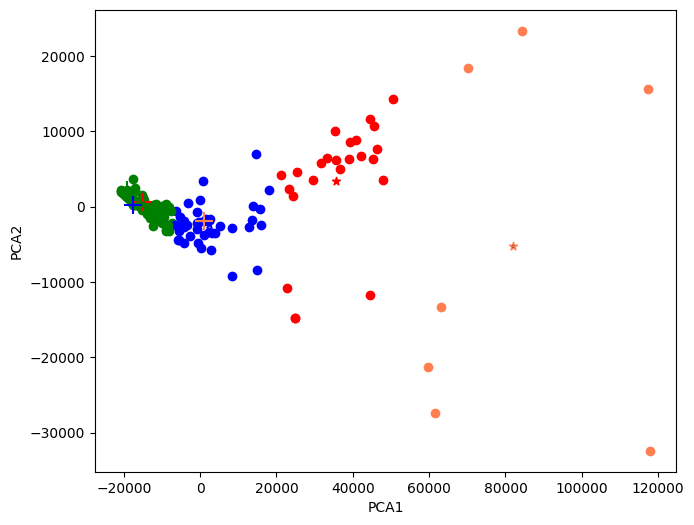

For n_clusters = 4 The average silhouette_score is : 0.5924156812760145


In [42]:
def kmeans(X,k,show_type='all',show_plots=True):
    c_prev=random_centroid(X,k)
    cluster=assign_cluster(X,c_prev,k)
    ini_centroid=c_prev
    diff=100
    while diff>0.001:
        cluster=assign_cluster(X,c_prev,k)
        c_new=compute_centroid(X,cluster,k)
        diff=difference(c_prev,c_new)
        c_prev=c_new
    c_new = compute_centroid (X, cluster,k) # to compute the new centroid point diff = difference (c_prev,c_new) #to compute the difference between the centroids c_prev=c_new # now new centroid becomes current centroid point
    #Final cluster centers
    if show_plots:
        print("\nInitial cluster Centers: \n")
        print(ini_centroid)
        print("\nFinal Cluster Centers: \n")
        print(c_prev)
        #Plotting the final plot
        print("\n\nFinal Plot: \n")
        show_clusters (X, cluster,c_prev,ini_centroid,mark_centroid=True, show_ini_centroid=True)
        return cluster,c_prev
cluster,cigga=kmeans(df_reduced,4)
silhouette_avg = silhouette_score(df_reduced, cluster)
print("For n_clusters =",4,"The average silhouette_score is :",silhouette_avg,)